In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("job_market_unemployment_trends.csv")
df

,id,date,location,unemployment_rate,job_postings,in_demand_skills,average_age,college_degree_percentage
0,1,2023-10-07,Houston,6.8,4894,"Agile Methodologies, Project Management",44,74
1,2,2025-05-24,Washington,11.1,2695,"Data Analysis, UX/UI Design, Digital Marketing",50,87
2,3,2024-09-28,Chicago,7.3,1174,"Agile Methodologies, Digital Marketing, Machin...",48,54
3,4,2024-12-28,Indianapolis,11.2,3708,"Cloud Computing, UX/UI Design",36,75
4,5,2023-09-10,New York,13.7,268,"SQL, Machine Learning, Python, Project Managem...",41,75
...,...,...,...,...,...,...,...,...
995,996,2023-11-07,Jacksonville,8.9,4127,"UX/UI Design, Data Analysis",43,84
996,997,2024-02-27,Austin,8.3,1203,"Project Management, JavaScript, Agile Methodol...",46,41
997,998,2023-10-13,Denver,4.9,184,"JavaScript, Project Management, Machine Learni...",25,68
998,999,2024-05-08,Dallas,6.7,3236,"Project Management, Digital Marketing, Sales, ...",25,65


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1000 non-null   int64  
 1   date                       1000 non-null   object 
 2   location                   1000 non-null   object 
 3   unemployment_rate          1000 non-null   float64
 4   job_postings               1000 non-null   int64  
 5   in_demand_skills           1000 non-null   object 
 6   average_age                1000 non-null   int64  
 7   college_degree_percentage  1000 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 62.6+ KB


In [4]:
df.describe()

,id,unemployment_rate,job_postings,average_age,college_degree_percentage
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,8.629700,2495.041000,37.859000,60.608000
std,288.819436,3.704272,1438.082857,7.611245,17.404173
min,1.000000,2.000000,53.000000,25.000000,30.000000
25%,250.750000,5.400000,1212.750000,31.000000,46.000000
50%,500.500000,8.800000,2497.500000,38.000000,60.000000
75%,750.250000,11.800000,3779.000000,44.000000,75.000000
max,1000.000000,15.000000,4997.000000,50.000000,90.000000


In [7]:
df["id"].duplicated().sum()

np.int64(0)

# Count of in_demand_skills as per their locations

In [25]:
gb = df.groupby(['in_demand_skills', 'location']).size().reset_index(name='count')
gb = gb.sort_values(by='count', ascending=False)
gb.head(10)

,in_demand_skills,location,count
247,"Customer Service, UX/UI Design",Dallas,2
331,"Data Analysis, Customer Service",Houston,2
249,"Customer Service, UX/UI Design",San Jose,2
158,"Cloud Computing, Sales",Houston,2
231,"Customer Service, SQL",Chicago,2
722,"Python, Cybersecurity",Columbus,2
776,"Python, UX/UI Design",Indianapolis,2
2,"Agile Methodologies, Cloud Computing, Data Ana...",Charlotte,1
3,"Agile Methodologies, Customer Service",Denver,1
4,"Agile Methodologies, Customer Service, Data An...",San Francisco,1


# Count of most in_demand_skills irrespective of their locations

In [26]:
gb = df.groupby('in_demand_skills').agg({'in_demand_skills': 'count'})
gb = gb.rename(columns={'in_demand_skills': 'count'})
gb = gb.sort_values(by='count', ascending=False)
gb.head(10)

,count
in_demand_skills,
"Customer Service, UX/UI Design",5
"Python, UX/UI Design",5
"Agile Methodologies, Cybersecurity",4
"Cloud Computing, Agile Methodologies",4
"Project Management, UX/UI Design",4
"SQL, Cybersecurity",4
"Machine Learning, Cybersecurity",4
"Project Management, Digital Marketing",4
"Python, Cybersecurity",4


# Count of the unemployed candidates as per their average age.

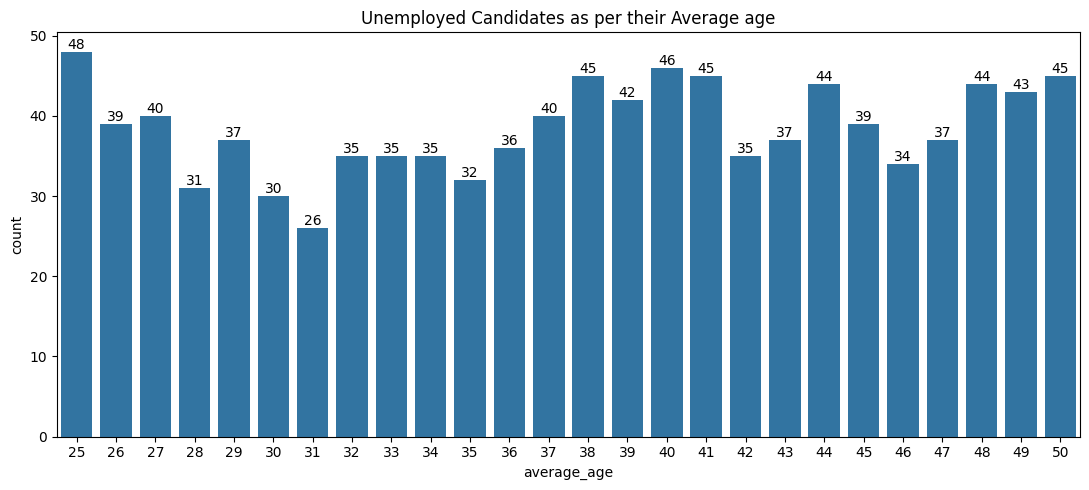

In [63]:
plt.figure(figsize = (11,5))
plt.title('Unemployed Candidates as per their Average age')
ax = sns.countplot(x = 'average_age', data = df)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

# Count of Most In-Demand Individual Skills

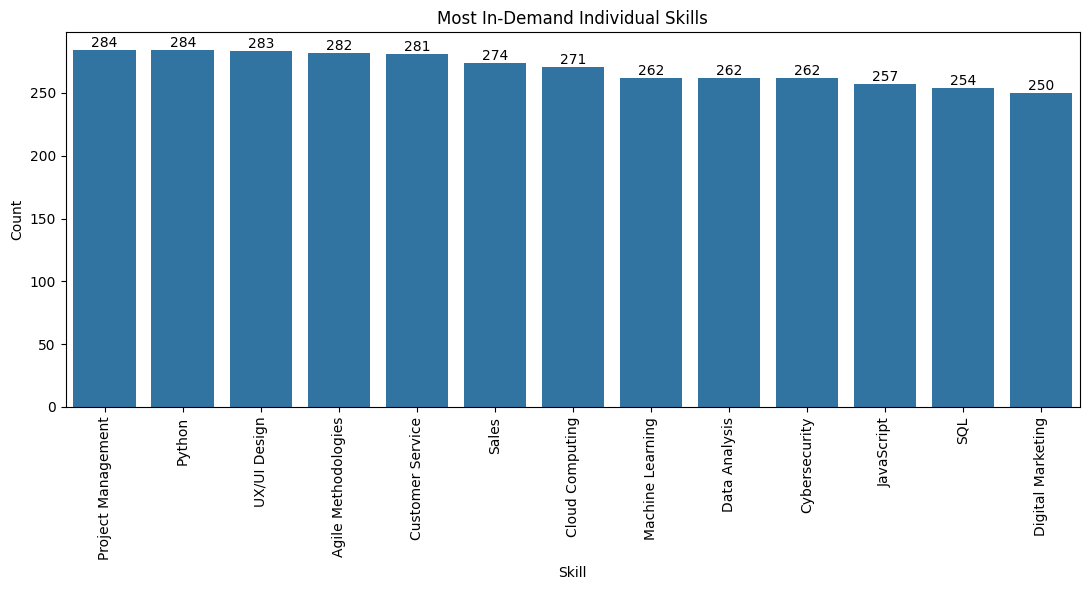

In [61]:
from collections import Counter

all_skills = df['in_demand_skills'].dropna().apply(lambda x: [skill.strip() for skill in x.split(',')])
flattened_skills = [skill for sublist in all_skills for skill in sublist]

skill_counts = Counter(flattened_skills)
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(11, 6))
ax = sns.barplot(data=skill_df, x='Skill', y='Count')
ax.bar_label(ax.containers[0])

plt.title('Most In-Demand Individual Skills')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This bar chart visualizes the most in-demand individual skills extracted from combined skill sets. It clearly highlights top skills like Python, SQL, and Machine Learning based on their frequency across all job records. This insight helps identify key technical competencies valued in the job market.

# Count of Job Postings as per the individual In-Demand Skills

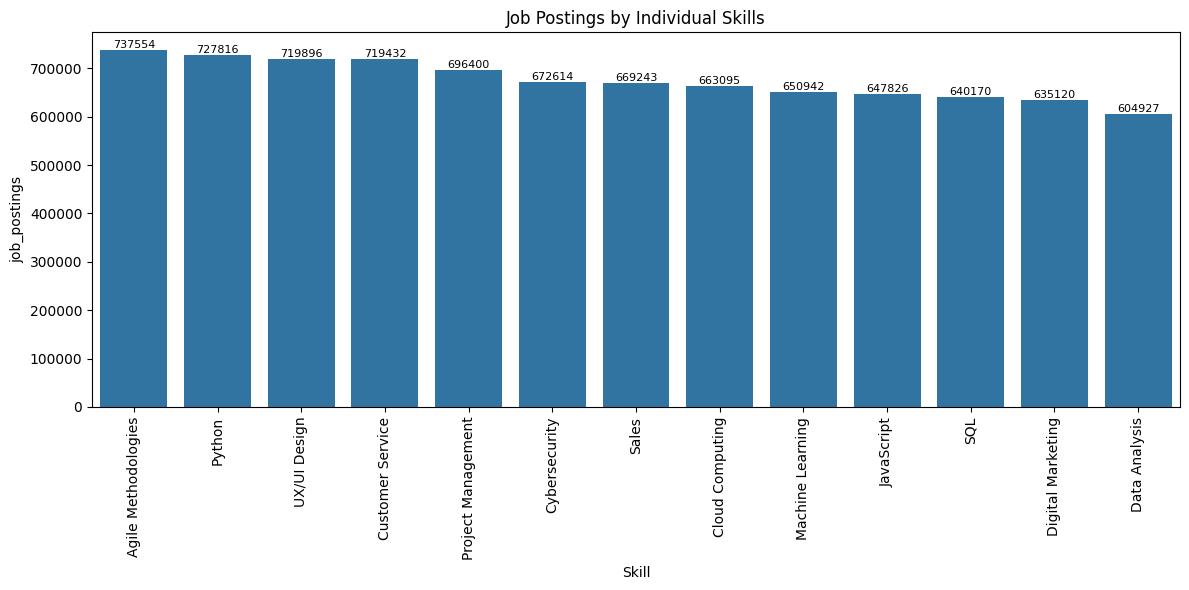

In [59]:
exploded_df = df.dropna(subset=['in_demand_skills'])
exploded_df = exploded_df.assign(Skill=exploded_df['in_demand_skills'].str.split(',')).explode('Skill')
exploded_df['Skill'] = exploded_df['Skill'].str.strip()

skill_postings_df = exploded_df.groupby('Skill', as_index=False)['job_postings'].sum().sort_values(by='job_postings', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=skill_postings_df, x='Skill', y='job_postings')
ax.bar_label(ax.containers[0], fontsize=8)
plt.title('Job Postings by Individual Skills')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


This bar chart shows the total number of job postings for each individual skill by splitting combined skill sets into separate entries. It highlights which specific skills, such as Python, SQL, or Machine Learning, are most in demand based on posting volume. This helps identify top-priority skills in the current job market.

# Top 10 Skills by Job Postings across the allover Locations

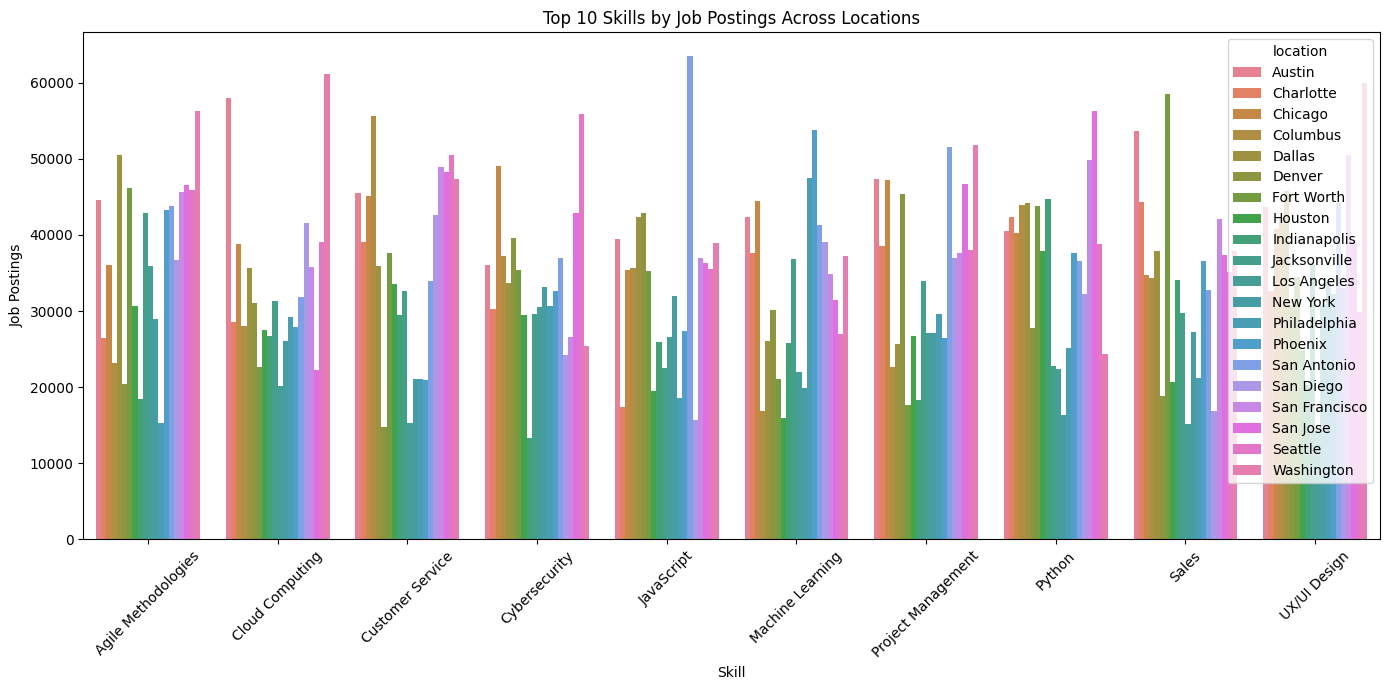

In [69]:
location_skill_df = exploded_df.groupby(['Skill', 'location'], as_index=False)['job_postings'].sum()

top_skills = location_skill_df.groupby('Skill')['job_postings'].sum().nlargest(10).index
filtered_df = location_skill_df[location_skill_df['Skill'].isin(top_skills)]

plt.figure(figsize=(14, 7))
sns.barplot(data=filtered_df, x='Skill', y='job_postings', hue='location')
plt.title('Top 10 Skills by Job Postings Across Locations')
plt.xticks(rotation=45)
plt.ylabel("Job Postings")
plt.tight_layout()
plt.show()

This grouped bar chart displays the top 10 most in-demand skills across various locations based on job postings. It clearly highlights which cities are hiring most for each skill, helping to identify regional demand patterns. Such insights are valuable for aligning skills with the right job markets.

# Correlation between College Education and Unemployement Rate

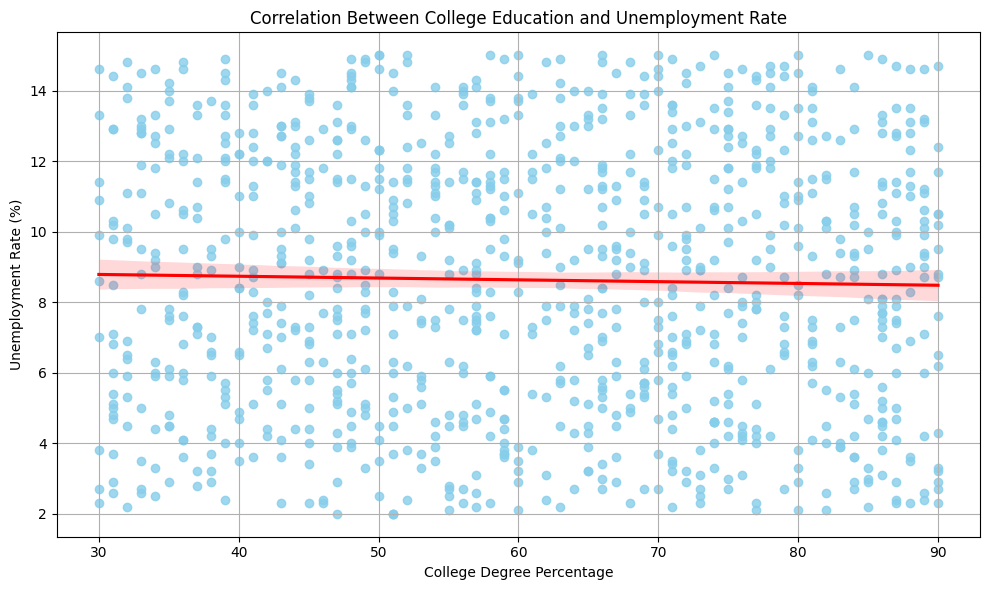

In [72]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='college_degree_percentage', y='unemployment_rate', scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})

plt.title('Correlation Between College Education and Unemployment Rate')
plt.xlabel('College Degree Percentage')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

This scatter plot with a regression line illustrates the relationship between college degree percentage and unemployment rate It suggests that regions with a higher proportion of college-educated individuals tend to experience lower unemployment, indicating a possible negative correlation.

# Monthly trend of Job Postings

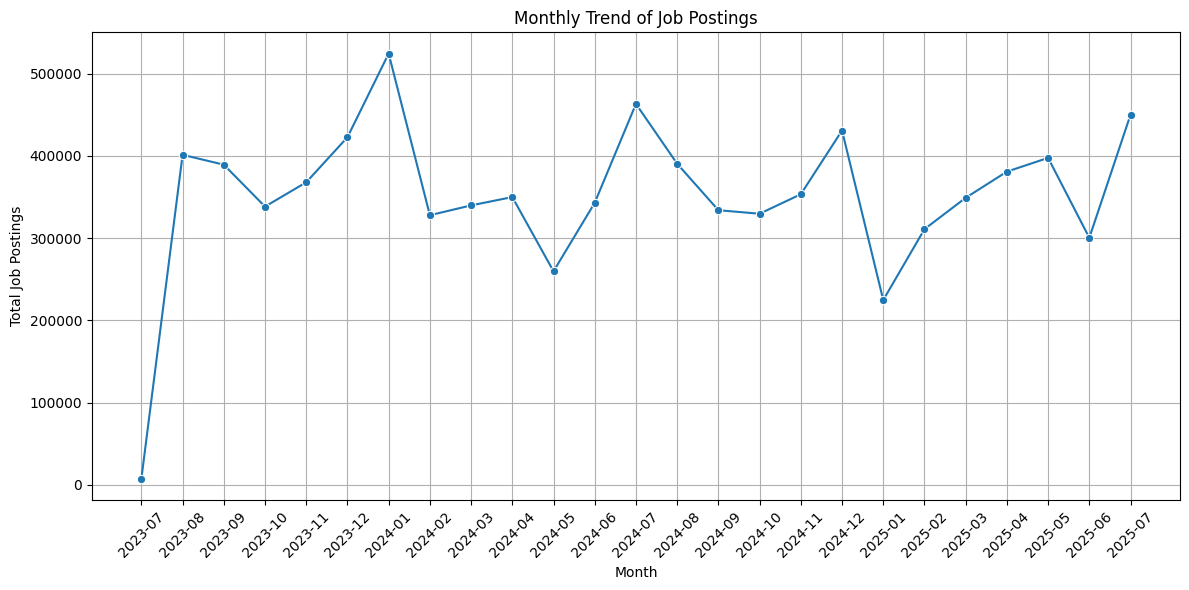

In [76]:
exploded_df['date'] = pd.to_datetime(exploded_df['date'])

exploded_df['month'] = exploded_df['date'].dt.to_period('M').astype(str)

monthly_trend = exploded_df.groupby('month')['job_postings'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='month', y='job_postings', marker='o')
plt.title('Monthly Trend of Job Postings')
plt.xlabel('Month')
plt.ylabel('Total Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

The line chart illustrates the monthly trend of job postings, helping to identify fluctuations in hiring demand over time. It reveals periods of growth or decline, which can be useful for understanding seasonality or external influences on the job market.